# Sklearn
Материал взят из репозитория https://github.com/emeli-dral/sklearn_intro

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import pandas as pd

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Генерация данных

In [4]:
blobs = datasets.make_blobs(centers=2, cluster_std=3.5, random_state=1)

In [5]:
blobs[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

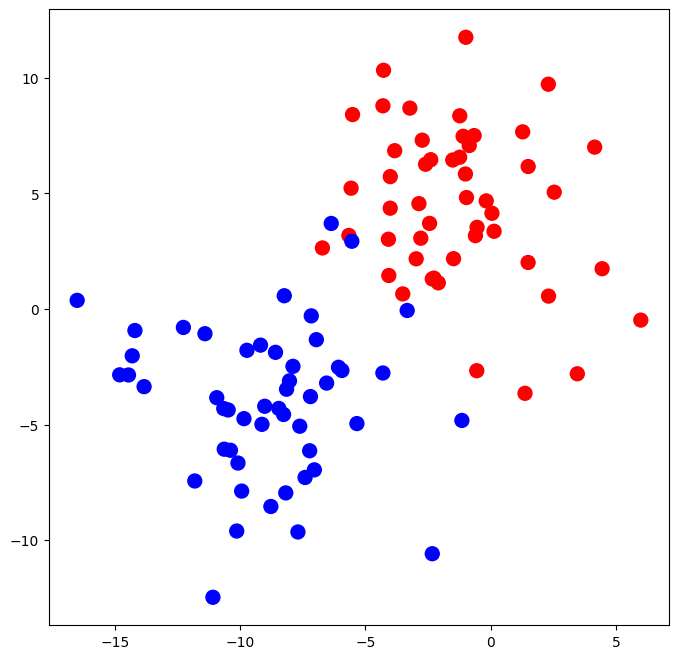

In [6]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0],
                                                                                    blobs[1], 
                                                                                    test_size=0.3,
                                                                                    random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)

train_data_standardized = scaler.transform(train_data)
test_data_standardized = scaler.transform(test_data)

### Линейная классификация

#### RidgeClassifier

In [9]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state=1)
ridge_classifier_stand = linear_model.RidgeClassifier(random_state=1)

In [10]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(random_state=1)

In [11]:
ridge_classifier_stand.fit(train_data_standardized, train_labels)

RidgeClassifier(random_state=1)

In [12]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)
ridge_predictions_stand = ridge_classifier_stand.predict(test_data_standardized)

In [13]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [14]:
print(ridge_predictions), print(ridge_predictions_stand)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


(None, None)

In [15]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions), metrics.accuracy_score(test_labels, ridge_predictions_stand)

(0.9666666666666667, 0.9666666666666667)

In [16]:
print('Intercept', ridge_classifier.intercept_ )
print('Coefficients', ridge_classifier.coef_)

Intercept [-0.50073421]
Coefficients [[-0.11164518 -0.0925014 ]]


In [17]:
print('Intercept', ridge_classifier_stand.intercept_ )
print('Coefficients', ridge_classifier_stand.coef_)

Intercept [0.08571429]
Coefficients [[-0.53232001 -0.49049301]]


####  Нарисуем границу принятия решения нашим классификатором

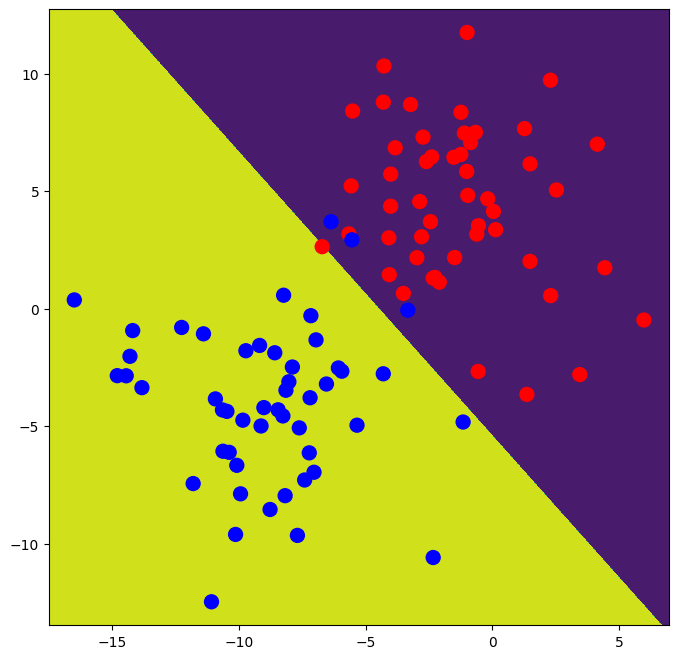

In [18]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, ridge_classifier, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

#### LogisticRegression

In [19]:
# c_states = [0, 0.5, 1., 2., 5, 10]
# q = []
# for C in c_states:
#     log_regressor2 = linear_model.LogisticRegression(random_state=0, tol = 1e-6)
#     log_regressor2.fit(train_data, train_labels)
#     lr_proba_predictions2 = log_regressor2.predict_proba(test_data)
#     lr_predictions2 = log_regressor2.predict(test_data)
#     m_r_auc = metrics.roc_auc_score(test_labels, lr_predictions2)
#     m_acc = metrics.accuracy_score(test_labels, ridge_predictions)
#     q.append([C, m_r_auc, m_acc])
# res = pd.DataFrame(q, columns = ['C', 'roc_auc', 'accuracy'])
# res

In [20]:
c_states = [0.1, 0.5, 1., 2., 5, 10]
q = []
for C in c_states:
    log_regressor2 = linear_model.LogisticRegression(random_state=0, tol = 1e-6, C = C)
    log_regressor2.fit(train_data, train_labels)
    lr_proba_predictions2 = log_regressor2.predict_proba(test_data)
    lr_predictions2 = log_regressor2.predict(test_data)
    m_r_auc = metrics.roc_auc_score(test_labels, lr_proba_predictions2[:, 1])
    m_acc = metrics.accuracy_score(test_labels, lr_predictions2)
    q.append([C, m_r_auc, m_acc])
res = pd.DataFrame(q, columns = ['C', 'roc_auc', 'accuracy'])
res

,C,roc_auc,accuracy
0,0.1,1.0,0.966667
1,0.5,1.0,0.900000
2,1.0,1.0,0.866667
3,2.0,1.0,0.866667
4,5.0,1.0,0.866667
5,10.0,1.0,0.866667


In [21]:
c_states = [0.1, 0.5, 1., 2., 5, 10]
q = []
for C in c_states:
    log_regressor_stand = linear_model.LogisticRegression(random_state=0, tol = 1e-6, C = C)
    log_regressor_stand.fit(train_data_standardized, train_labels)
    lr_proba_predictions_stand = log_regressor_stand.predict_proba(test_data_standardized)
    lr_predictions_stand = log_regressor_stand.predict(test_data_standardized)
    m_r_auc = metrics.roc_auc_score(test_labels, lr_proba_predictions_stand[:, 1])
    m_acc = metrics.accuracy_score(test_labels, lr_predictions_stand)
    q.append([C, m_r_auc, m_acc])
res_stand = pd.DataFrame(q, columns = ['C', 'roc_auc', 'accuracy'])
res_stand

,C,roc_auc,accuracy
0,0.1,1.0,0.966667
1,0.5,1.0,0.966667
2,1.0,1.0,0.966667
3,2.0,1.0,0.966667
4,5.0,1.0,0.933333
5,10.0,1.0,0.933333


In [22]:
log_regressor = linear_model.LogisticRegression(random_state=0, tol = 1e-6, C = 0.1)
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=0.1, random_state=0, tol=1e-06)

In [23]:
lr_predictions = log_regressor.predict(test_data)

In [24]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [25]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [26]:
print(lr_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


In [27]:
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

1.0


In [28]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.9666666666666667


In [29]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.9666666666666667


In [30]:
print('Intercept', log_regressor.intercept_ )
print('Coefficient', log_regressor.coef_)

Intercept [-2.1996867]
Coefficient [[-0.63033613 -0.45512257]]


In [31]:
attr1 = (train_data[:,0] - sum(train_data[:,0]) / len(train_data[:,0]))
attr2 = (train_data[:,1] - sum(train_data[:,1]) / len(train_data[:,1]))
import math
disp1 = math.sqrt(sum(attr1 * attr1))
disp2 = math.sqrt(sum(attr2 * attr2))

sum(attr1 * attr2) / disp1 / disp2

0.4795781017934207

In [32]:
import pandas as pd
pd.DataFrame(train_data).corr()

,0,1
0,1.000000,0.479578
1,0.479578,1.000000


####  Нарисуем границу принятия решения нашим классификатором

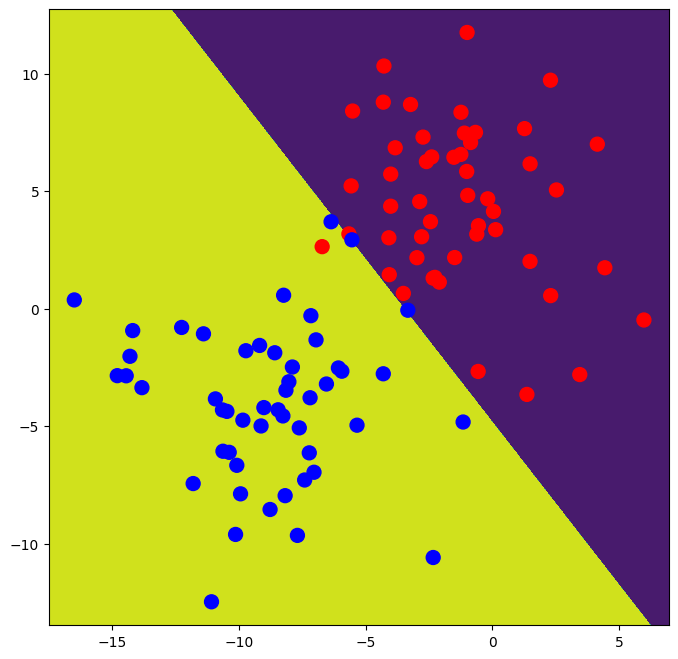

In [33]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

### Оценка качества по cross-validation

#### cross_val_score

In [34]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier,
                                                blobs[0],
                                                blobs[1],
                                                scoring='accuracy',
                                                cv=10)

In [35]:
lr_scoring = model_selection.cross_val_score(log_regressor,
                                             blobs[0],
                                             blobs[1],
                                             scoring='accuracy',
                                             cv=10)

In [36]:
ridge_scoring

array([1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9, 0.9])

In [37]:
lr_scoring

array([0.9, 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9, 0.9])

In [38]:
print('Ridge mean:{}, max:{}, min:{}, std:{:2f}'.format(ridge_scoring.mean(),
                                                        ridge_scoring.max(),
                                                        ridge_scoring.min(),
                                                        ridge_scoring.std()))

Ridge mean:0.9700000000000001, max:1.0, min:0.9, std:0.045826


In [39]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),
                                                   lr_scoring.max(), 
                                                   lr_scoring.min(),
                                                   lr_scoring.std()))

Log mean:0.96, max:1.0, min:0.9, std:0.04898979485566354


#### cross_val_score с заданными scorer и cv_strategy

In [40]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [41]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20,
                                                     test_size=0.3,
                                                     random_state=2)

In [42]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier,
                                                blobs[0],
                                                blobs[1],
                                                scoring=scorer,
                                                cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [43]:
lr_scoring = model_selection.cross_val_score(log_regressor,
                                             blobs[0],
                                             blobs[1],
                                             scoring=scorer,
                                             cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [44]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(),
                                                     ridge_scoring.max(), 
                                                     ridge_scoring.min(),
                                                     ridge_scoring.std()))

Ridge mean:0.958333333333333, max:1.0, min:0.9, std:0.02763853991962833


In [45]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),
                                                   lr_scoring.max(), 
                                                   lr_scoring.min(), 
                                                   lr_scoring.std()))

Log mean:0.9549999999999997, max:1.0, min:0.9, std:0.030322342331100413
